# CONFRONTO TRA PSD E SPETTROGRAMMA

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, spectrogram, welch
from scipy.fft import fftshift

### Creo il segnale sinusoidale con frequenze che aumentano nel tempo (chirp)

In [238]:
duration = 10
points = 10000

sampling = points/duration

print("Frequenza di campionamento di:", sampling, "Hz. Non posso usare una f1 sopra i", sampling/2, "Hz se no vado in contro ad aliasing")

t = np.linspace(0, duration, points)
w = chirp(t, f0=0, f1=100, t1=10, method="linear")

Frequenza di campionamento di: 1000.0 Hz. Non posso usare una f1 sopra i 500.0 Hz se no vado in contro ad aliasing


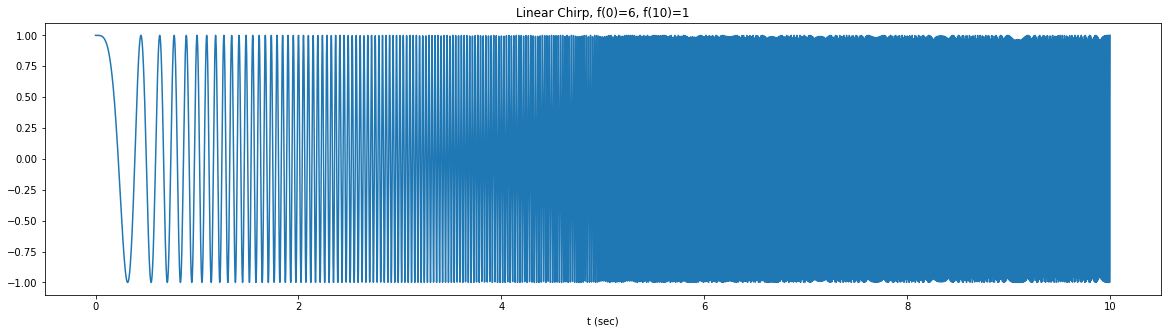

In [239]:
plt.figure(figsize=(20, 5))
plt.plot(t,w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.show()

### Faccio la Power Spectral density con metodo di finestratura di Welch

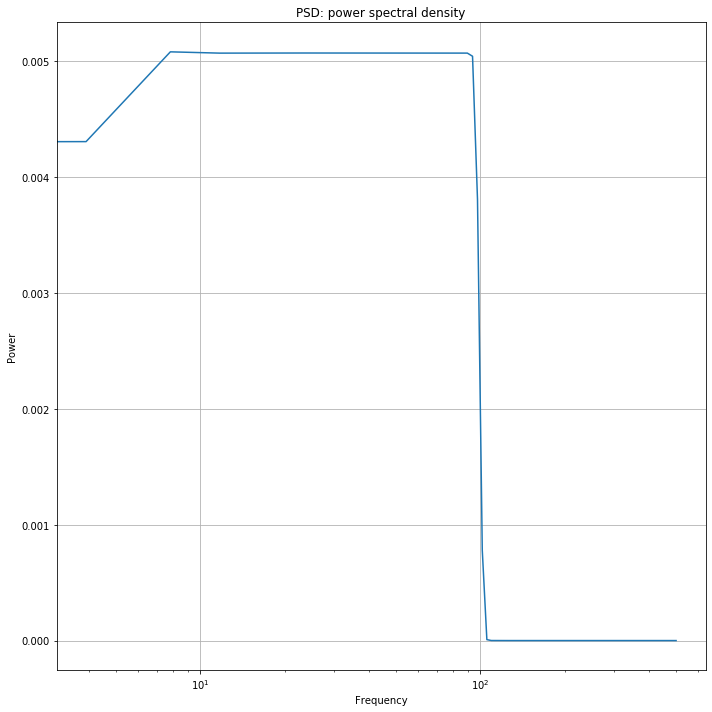

In [240]:
freqs, psd = welch(w, sampling)

plt.figure(figsize=(10, 10))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()
plt.tight_layout()

Nella PSD (fatta con Fourier normale) vedo tutte le frequenze belle precise da f0 a f1 da me impostate. Il problema è che non so quando sono localizzate nel tempo!!

### Faccio lo spettrogramma

In [241]:
f, t, Sxx = spectrogram(w, sampling)

In [242]:
t 

#Qui ha ritagliato un pezzetto di segnale, probabilmente è dovuto ad una qualche finestratura che ha bisogno di campioni iniziali per partire

array([0.128, 0.352, 0.576, 0.8  , 1.024, 1.248, 1.472, 1.696, 1.92 ,
       2.144, 2.368, 2.592, 2.816, 3.04 , 3.264, 3.488, 3.712, 3.936,
       4.16 , 4.384, 4.608, 4.832, 5.056, 5.28 , 5.504, 5.728, 5.952,
       6.176, 6.4  , 6.624, 6.848, 7.072, 7.296, 7.52 , 7.744, 7.968,
       8.192, 8.416, 8.64 , 8.864, 9.088, 9.312, 9.536, 9.76 ])

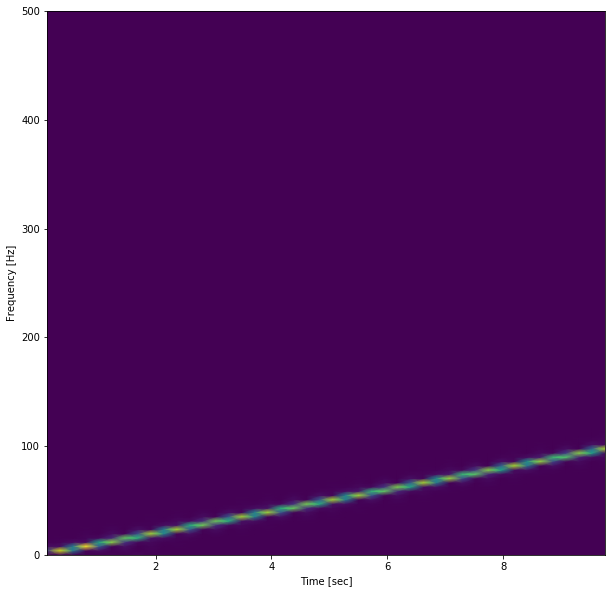

In [243]:
plt.figure(figsize=(10, 10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Qui grazie allo spettrogramma riesco a capire dove sono localizzate le frequenze nel tempo!

Le frequenze crescono linearmente nel tempo! Se avessi messi "Quadratic" quando stavo generando la sweep => sarebbe uscita una parabola